# Overall 
- 대주제 : 국내 시장 금리 변화에 따른 주요 배당주 ETF 상품별 변화 분석
    - 가설 : 금리 상승기에는 배당주 ETF의 자금 유입이 감소하거나 자금 유출이 증가한다 
        - 귀무가설 : 금리 상승기에는 배당주 ETF의 자금 유입이 감소하거나 자금 유출이 증가하지 않는다
        - 대립가설 : 금리 상승기에는 배당주 ETF의 자금 유입이 감소하거나 자금 유출이 증가한다
- 결론 :
    - 대립가설 채택 : 
        - 자금 유입 및 유출의 척도가 될 수 있는 '순자산가치(NAV) 와 순자산총액'은 금리와 통계적으로 유의미한 상관성을 지니는 것으로 확인되었습니다.   
            - 금리(x)와 순자산가치(y) 피어슨 상관계수: 0.34, p-value: 0.0000, 금리와 순자산가치(NAV) 간의 상관관계는 통계적으로 유의합니다.
            - 금리(x)와 순자산총액(y) 피어슨 상관계수: -0.32, p-value: 0.0000, 금리와 순자산총액 간의 상관관계는 통계적으로 유의합니다.
            
    - 금리 변화에 따른 NAV 예측은 낮은 정확도를 보였으며, 이로서 NAV 증감에 영향을 주는 다양한 특성이 있는 것으로 예상하였습니다
        - 근거 1 : 금리 변화와 거래량, 거래대금 분석 및 상관계수 확인을 통해 유의적 상관성이 낮음을 확인
        - 근거 2 : '자금 유입 감소/유출의 척도로 판단이 가능하다고 알려져 있고, 보다 높은 상관계수를 가진 '순자산가치(NAV)' 지표를 확인
            - 1차로 거래량, 거래대금 특성 기준으로 분석을 시도하였으나, 시각화를 통해 금리와는 높은 상관성을 보이지 않았던 점을 감안하여, 'NAV' 특성을 기준으로 분석 재시도 
        - 근거 3 : 금리 변화와 배당주 ETF의 순자산 변화 간 유의미 성을 확인, 금리 상승기에는 배당주 ETF의 순자산이 평균적으로 증가하는 경향이 있고, 금리 하락기에는 자금 유출이 더 크게 나타나는 경향을 보임
        - 근거 4 : 금리, NAV 지표를 기준으로 선형 회귀 모델, 결정 트리 모델을 활용하여 예측을 시도하였으나 상대적으로 낮은 신뢰도를 보였으며, 이에 변동 예측을 위해서는 추가적인 지표 탐색 및 선정이 필요할 것으로 사료
- 회고 : 
    - EDA 부족 : 데이터 셋 내 NAV(순자산가치) 및 순자산 항목으로 구분되어 있음에도, 분석 과정에서 이를 혼동하고 분석 진행하였으며, 의도와는 다른 분석 결과를 도출하였습니다
    - 모델에 대한 이해도 부족 : 숙지 수준이 낮아 검증 위한 다양한 모델들을 적극 활용하지 못하였고 이는 분석 결과의 정확도를 낮추는 원인이 되었습니다
    - 분석을 위하여 부족한 부분을 파악하는 계기가 되었습니다 

# 데이터 수집
- 한국은행 기준금리 추이
    - https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643
    - 집계 기간 : 20181130 - 20241011
    - combined_date, rate(금리)

- 대상 ETF 상품
    - KODEX 고배당 (279530) | ETF http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030105#
    - 집계 기간 : 20190101 - 20241102

In [1]:
# 한국은행 기준금리 추이 데이터 수집
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643'
response = rq.get(url)

html = BeautifulSoup(response.content, 'html.parser')

# 타겟 태그 확인
# <div class="table tac">
    # <td class="fb">2024</td>
    # <td>11월 28일</td>
    # <td>3.00</td>
years = html.select('.table.tac td.fb') # table tac 클래스 내 fb 클래스명을 가진 td 태그 select 
year = [i.text for i in years]
dates = html.select('.table.tac td:nth-child(2)') # table tac 클래스 내 두 번째 자식 요소 select 
date = [i.text for i in dates]
rates = html.select('.table.tac td:nth-child(3)') # table tac 클래스 내 세 번째 자식 요소 select
rate = [i.text for i in rates]



In [2]:
# 판다스 데이터프레임 생성 
import pandas as pd
df_gijungumri = pd.DataFrame({'year':year, 'date':date, 'rate':rate})


In [5]:
# year 항목과 date 항목을 합친 combined_date 열 생성
df_gijungumri['combined_date'] = df_gijungumri['year'].astype(str) + '-' + df_gijungumri['date'].str.replace('월 ', '-').str.replace('일', '')
df_gijungumri[['year', 'date', 'combined_date', 'rate']].head()


,year,date,combined_date,rate
0,2024,11월 28일,2024-11-28,3.00
1,2024,10월 11일,2024-10-11,3.25
2,2023,01월 13일,2023-01-13,3.50
3,2022,11월 24일,2022-11-24,3.25
4,2022,10월 12일,2022-10-12,3.00


In [15]:
# 2018년도까지만 필터링
df_gijungumri['year'] = df_gijungumri['year'].astype(int) # int 자료형으로 변환
filtered_gumri = df_gijungumri[df_gijungumri['year'] >= 2018] # year 가 2018 이상인 항목들만 필터

print(filtered_gumri[['year']].value_counts) # 연도 필터 여부 체크
print("---")
print(len(filtered_gumri[['year']])) 
# filtered_gumri[['year', 'date', 'combined_date', 'rate']].head()



<bound method DataFrame.value_counts of     year
0   2024
1   2024
2   2023
3   2022
4   2022
5   2022
6   2022
7   2022
8   2022
9   2022
10  2021
11  2021
12  2020
13  2020
14  2019
15  2019
16  2018>
---
17


In [19]:
# 금리 데이터 rename
filtered_gumri.rename(columns={'combined_date':'일자'}, inplace = True) # 컬럼명 변경 후 그대로 반환 
#df_kodex.rename(columns={'일자':'combined_date'}, inplace = True)
filtered_gumri_subset = filtered_gumri[['일자', 'rate']]

display(
    filtered_gumri.head()
    , "---"
    , filtered_gumri_subset.head())

C:\Users\jd421\AppData\Local\Temp\ipykernel_42552\3006754180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gumri.rename(columns={'combined_date':'일자'}, inplace = True) # 컬럼명 변경 후 그대로 반환


,year,date,rate,일자
0,2024,11월 28일,3.00,2024-11-28
1,2024,10월 11일,3.25,2024-10-11
2,2023,01월 13일,3.50,2023-01-13
3,2022,11월 24일,3.25,2022-11-24
4,2022,10월 12일,3.00,2022-10-12


'---'

,일자,rate
0,2024-11-28,3.00
1,2024-10-11,3.25
2,2023-01-13,3.50
3,2022-11-24,3.25
4,2022-10-12,3.00


In [20]:
# KODEX 고배당 (279530)
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/data_analysis_2409/project_241109/pdf/002960/data_20241102.csv')

df = pd.read_csv('G:\\내 드라이브\\study_course_certificate\\ICT\\data_analysis_2409_2411\\project_241109\\dataset\\my\\krx\\krx_merge.csv')
df_279530 = df

In [21]:
df_279530.head()

,일자,종가,대비,등락률,순자산가치(NAV),시가,고가,저가,거래량,거래대금,시가총액,순자산총액,상장좌수,기초지수_지수명,기초지수_종가,기초지수_대비,기초지수_등락률
0,11/1/2024,10385,20,0.19,10399.25,10380,10400,10350,33915,352313325,35309000000,34317535145,3400000,FnGuide ?????? Plus ????,15841.86,8.79,0.06
1,10/31/2024,10365,15,-0.14,10393.79,10400,10400,10300,24112,249642115,35241000000,35338882364,3400000,FnGuide ?????? Plus ????,15833.07,33.00,-0.21
2,10/30/2024,10380,0,0.00,10415.35,10415,10415,10360,23287,241826565,35292000000,35412197735,3400000,FnGuide ?????? Plus ????,15866.07,37.38,0.24
3,10/29/2024,10415,35,0.34,10391.20,10405,10430,10370,15458,160804310,31245000000,35330065352,3000000,FnGuide ?????? Plus ????,15828.69,39.51,0.25
4,10/28/2024,10380,30,-0.29,10401.29,10410,10410,10335,19002,196866630,31140000000,31203857601,3000000,FnGuide ?????? Plus ????,15789.18,19.18,-0.12


# 데이터 스키마
| **항목**            | **정의**                                                                                 |
|----------------------|------------------------------------------------------------------------------------------|
| **일자**             | 거래 또는 데이터가 기록된 날짜.                                                          |
| **종가**             | 주식 또는 자산의 거래가 종료된 시점의 가격.                                              |
| **대비**             | 종가가 전일 종가 대비 얼마나 변했는지를 나타냄. 계산식: `종가 - 전일 종가`.               |
| **등락률**           | 종가가 전일 종가 대비 몇 퍼센트 변했는지를 나타냄. 계산식: `(종가 - 전일 종가) / 전일 종가 * 100`. |
| **순자산가치(NAV)**  | 자산의 총 가치에서 부채를 뺀 순자산의 가치.                                              |
| **시가**             | 하루 거래가 시작될 때 최초로 형성된 가격.                                                |
| **고가**             | 하루 동안 거래된 최고 가격.                                                             |
| **저가**             | 하루 동안 거래된 최저 가격.                                                             |
| **거래량**           | 하루 동안 거래된 주식의 총 개수.                                                        |
| **거래대금**         | 하루 동안 거래된 총 금액. 계산식: `거래량 * 해당 시점의 가격`.                           |
| **시가총액**         | 회사의 주식 총수에 현재 주가를 곱한 값으로, 회사의 전체 시장 가치를 나타냄.               |
| **순자산총액**       | 자산 총액에서 부채를 뺀 총 순자산의 금액.                                               |
| **상장좌수**         | 특정 자산(예: 펀드 또는 ETF)의 발행 좌수.                                                |
| **기초지수_지수명**   | 추적하고 있는 기초 지수의 이름.                                                         |
| **기초지수_종가**     | 기초 지수의 하루 종가.                                                                 |
| **기초지수_대비**     | 기초 지수의 종가가 전일 대비 얼마나 변했는지. 계산식: `기초지수_종가 - 전일 기초지수_종가`. |
| **기초지수_등락률**   | 기초 지수의 종가가 전일 대비 몇 퍼센트 변했는지. 계산식: `(기초지수_종가 - 전일 기초지수_종가) / 전일 기초지수_종가 * 100`. |


# 가설 증명 위한 특성 선정 근거
- 금리 상승기에는 배당주 ETF의 자금 유입이 감소하거나 자금 유출이 증가한다 라는 가설 증명 위해 활용할 수 있는 특성으로 거래량, 거래대금 으로 1차 선정
    - 차트를 통해 금리 변화에 따른 거래량, 거래대금 변화가 두드러지지 않은 것을 확인
    - 자금 흐름을 간접적으로 파악할 수 있는 특성으로 순자산가치(NAV)와 순자산총액을 2차 선정하여 분석 진행
    - 차트를 통해 거래량, 거래대금 대비 금리 변화에 민감한 변화를 보이는 것을 확인

- Chatgpt
    - ## 자산가치와 순자산총액과의 차이
        - 순자산가치(NAV, Net Asset Value)와 순자산총액은 자산을 평가할 때 사용하는 용어이지만, 의미와 사용 목적에 차이가 있습니다.
        - 순자산가치 (Net Asset Value, NAV)
            - 순자산가치는 주로 투자 펀드나 상장지수펀드(ETF)와 같은 집합 투자 상품에서 사용되는 개념입니다. <br>펀드가 보유한 모든 자산의 총 가치에서 부채를 제외한 순수 자산의 가치를 펀드의 총 발행된 단위 수로 나누어 단위당 가치를 계산한 것입니다. <br>즉, 순자산가치는 펀드 단위의 가치를 나타내며, 투자자가 펀드를 매매할 때 기준이 됩니다.
            - 계산식: 순자산가치 = (총 자산 - 총 부채) / 발행된 펀드 단위 수
        - 순자산총액
            - 순자산총액은 주로 기업의 자산 평가에서 사용되는 개념으로, 기업이 소유한 자산에서 모든 부채를 뺀 금액을 말합니다. <br>기업의 재무상태를 나타내는 중요한 지표로 사용되며, 주주가 보유하고 있는 순 자산의 총합으로도 볼 수 있습니다. <br>순자산총액은 보통 기업의 재무제표에서 확인할 수 있습니다.
            - 계산식: 순자산총액 = 총 자산 - 총 부채
        - 요약하자면, 순자산가치는 펀드 단위의 가치를 의미하고, 순자산총액은 기업이 소유한 자산에서 부채를 뺀 총액을 의미합니다.
    - ## 순자산가치가 ETF의 자금 유입 또는 유출의 척도가 될 수 있는가 
        - **순자산가치(NAV, Net Asset Value)**는 ETF의 자금 유입 또는 유출의 척도로 사용될 수 있습니다. 하지만 직접적인 자금 유입 또는 유출을 나타내는 지표는 아니며, 몇 가지 간접적인 방식으로 이를 유추할 수 있습니다.

        - 프리미엄과 디스카운트의 발생
        - ETF의 실제 시장 가격이 순자산가치보다 높거나 낮은 경우 프리미엄 또는 디스카운트가 발생합니다. <br>이는 투자자들의 수요와 공급이 순자산가치에 비해 얼마나 높은지 또는 낮은지를 보여주며, 간접적으로 자금 유입 또는 유출을 반영할 수 있습니다. <br>예를 들어, 시장에서 ETF 가격이 NAV보다 높으면 프리미엄 상태이며, 이는 자금이 유입되고 있다는 신호일 수 있습니다. 반대로 ETF 가격이 NAV보다 낮으면 디스카운트 상태로, 자금 유출의 신호일 수 있습니다.

        - 순자산가치 변동 추이 분석
        - NAV의 변화는 ETF가 보유한 자산 가치의 변동과 함께 자금 유입 및 유출에 영향을 받을 수 있습니다. <br>특히 NAV가 꾸준히 증가하면 신규 자금이 유입되었을 가능성이 있고, NAV가 감소하면 자금 유출이 발생했을 가능성이 있습니다. <br>다만, 이 경우에는 시장 상황이나 보유 자산의 가치 변동도 함께 고려해야 합니다.

        - ETF 거래량
        - ETF의 순자산가치와 별개로, 거래량은 투자자들의 자금 흐름을 확인할 수 있는 직접적인 지표 중 하나입니다. <br>거래량이 급증하면 투자자들이 적극적으로 ETF에 자금을 넣거나 빼고 있다는 것을 의미할 수 있으며, NAV와의 프리미엄/디스카운트 여부를 통해 구체적인 자금 유입/유출의 양상을 더 잘 파악할 수 있습니다.

        - 결론적으로, 순자산가치 자체가 자금 유입 또는 유출을 나타내는 직접적인 척도는 아니지만, 프리미엄/디스카운트 상태와 NAV의 변동 추이를 통해 간접적으로 자금 흐름을 파악할 수 있습니다.

    - ## 순자산총액이 ETF의 자금 유입 또는 유출의 척도가 될 수 있는가 
        - 네, **순자산총액 (Total Net Assets)**은 ETF의 자금 유입 또는 유출을 간접적으로 파악하는 데 사용할 수 있는 중요한 지표입니다. 순자산총액은 ETF가 보유한 총 자산에서 부채를 뺀 금액으로, 다음과 같은 방식으로 자금 흐름을 간접적으로 나타낼 수 있습니다.

        - 순자산총액의 변화
        - ETF의 순자산총액은 일반적으로 자산 가격 변동과 자금 유입 및 유출의 영향을 모두 받습니다. <br>특정 기간 동안 순자산총액이 꾸준히 증가한다면 새로운 자금이 유입된 신호일 수 있으며, 순자산총액이 감소하면 자금 유출이 발생했을 가능성이 있습니다. <br>물론, 순자산총액의 증감은 ETF 보유 자산의 가격 변동에도 영향을 받으므로, 자금 흐름만을 단독으로 나타내지는 않지만 유의미한 힌트를 제공합니다.

        - ETF의 창출 및 환매 과정
        - ETF의 순자산총액 증감은 펀드 운용사가 **신규 발행 (창출)**이나 환매 (상환) 과정을 통해 ETF 단위를 추가하거나 줄이는 방식으로 자금 흐름을 반영합니다. <br>즉, ETF의 수요가 증가하여 시장 가격이 NAV보다 높아질 경우, 운용사는 새로운 ETF 단위를 창출하여 시장에 공급하고 순자산총액이 증가합니다. <br>반대로 수요가 줄어들어 ETF 가격이 NAV보다 낮아지면, 운용사는 ETF 단위를 환매하여 시장에서 회수하며 순자산총액이 감소합니다. 이 과정을 통해 자금 유입과 유출이 순자산총액에 반영됩니다.

        - 시장 상황과 투자자들의 수요에 따른 간접적인 척도
        - 순자산총액은 ETF의 전체 규모를 나타내는 동시에, 투자자들이 해당 ETF에 얼마나 많은 자금을 넣고 있는지를 보여주는 지표로도 해석됩니다. <br>순자산총액이 큰 ETF는 비교적 안정적인 자금 유입을 받고 있는 반면, 순자산총액이 급격히 감소하는 경우 투자자들이 자금을 빼고 있는 상황일 수 있습니다.

        - 결론적으로, 순자산총액은 ETF의 자금 유입 및 유출을 직접적으로 측정하는 지표는 아니지만, 자금 흐름의 변화를 간접적으로 나타내는 데 유용한 척도입니다.


In [23]:
# '일자' 컬럼을 datetime 형식으로 변환한 뒤 원하는 포맷으로 변경

df_279530['일자'] = pd.to_datetime(df_279530['일자']).dt.strftime('%Y-%m-%d')
filtered_gumri_subset['일자'] = pd.to_datetime(filtered_gumri_subset['일자']).dt.strftime('%Y-%m-%d')

display(
    df_279530.info()
    , filtered_gumri_subset.info()
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일자          1437 non-null   object 
 1   종가          1437 non-null   int64  
 2   대비          1437 non-null   int64  
 3   등락률         1437 non-null   float64
 4   순자산가치(NAV)  1437 non-null   float64
 5   시가          1437 non-null   int64  
 6   고가          1437 non-null   int64  
 7   저가          1437 non-null   int64  
 8   거래량         1437 non-null   int64  
 9   거래대금        1437 non-null   int64  
 10  시가총액        1437 non-null   int64  
 11  순자산총액       1437 non-null   int64  
 12  상장좌수        1437 non-null   int64  
 13  기초지수_지수명    1437 non-null   object 
 14  기초지수_종가     1437 non-null   float64
 15  기초지수_대비     1437 non-null   float64
 16  기초지수_등락률    1437 non-null   float64
dtypes: float64(5), int64(10), object(2)
memory usage: 191.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 17 e

C:\Users\jd421\AppData\Local\Temp\ipykernel_42552\3018887589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gumri_subset['일자'] = pd.to_datetime(filtered_gumri_subset['일자']).dt.strftime('%Y-%m-%d')


None

None

In [24]:
# '일자'를 기준으로 df_279530에 filtered_gumri_subset 병합
merged_df = pd.merge(
    df_279530, 
    filtered_gumri_subset, 
    on='일자',  # 공통 열
    how='outer'  # 모든 데이터를 유지, outer join
)

# 날짜 기준으로 정렬 후 인덱스 리셋
merged_df = merged_df.sort_values(by='일자').reset_index(drop=True)

# 결과 확인
print(merged_df.info())
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일자          1439 non-null   object 
 1   종가          1437 non-null   float64
 2   대비          1437 non-null   float64
 3   등락률         1437 non-null   float64
 4   순자산가치(NAV)  1437 non-null   float64
 5   시가          1437 non-null   float64
 6   고가          1437 non-null   float64
 7   저가          1437 non-null   float64
 8   거래량         1437 non-null   float64
 9   거래대금        1437 non-null   float64
 10  시가총액        1437 non-null   float64
 11  순자산총액       1437 non-null   float64
 12  상장좌수        1437 non-null   float64
 13  기초지수_지수명    1437 non-null   object 
 14  기초지수_종가     1437 non-null   float64
 15  기초지수_대비     1437 non-null   float64
 16  기초지수_등락률    1437 non-null   float64
 17  rate        17 non-null     object 
dtypes: float64(15), object(3)
memory usage: 202.5+ KB
None


,일자,종가,대비,등락률,순자산가치(NAV),시가,고가,저가,거래량,거래대금,시가총액,순자산총액,상장좌수,기초지수_지수명,기초지수_종가,기초지수_대비,기초지수_등락률,rate
0,2018-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75
1,2019-01-02,8655.0,145.0,-1.65,8654.95,8785.0,8795.0,8595.0,48393.0,419181075.0,5.625750e+10,5.625720e+10,6500000.0,FnGuide ?????? Plus ????,12938.76,224.14,-1.70,NaN
2,2019-01-03,8565.0,90.0,-1.04,8576.30,8655.0,8655.0,8565.0,2114.0,18183245.0,5.567250e+10,5.574593e+10,6500000.0,FnGuide ?????? Plus ????,12816.18,122.58,-0.95,NaN
3,2019-01-04,8610.0,45.0,0.53,8614.22,8550.0,8615.0,8535.0,22703.0,195284080.0,5.596500e+10,5.599244e+10,6500000.0,FnGuide ?????? Plus ????,12875.87,59.69,0.47,NaN
4,2019-01-07,8670.0,60.0,0.70,8672.54,8640.0,8700.0,8640.0,1779.0,15411955.0,5.635500e+10,5.637152e+10,6500000.0,FnGuide ?????? Plus ????,12966.84,90.97,0.71,NaN


In [25]:
# rate 컬럼 결측치 보완
merged_df_1 = merged_df
merged_df_1['rate'] = merged_df_1['rate'].fillna(method='ffill')

C:\Users\jd421\AppData\Local\Temp\ipykernel_42552\1514963424.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_1['rate'] = merged_df_1['rate'].fillna(method='ffill')


In [27]:
merged_df_1.head()

,일자,종가,대비,등락률,순자산가치(NAV),시가,고가,저가,거래량,거래대금,시가총액,순자산총액,상장좌수,기초지수_지수명,기초지수_종가,기초지수_대비,기초지수_등락률,rate
0,2018-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75
1,2019-01-02,8655.0,145.0,-1.65,8654.95,8785.0,8795.0,8595.0,48393.0,419181075.0,5.625750e+10,5.625720e+10,6500000.0,FnGuide ?????? Plus ????,12938.76,224.14,-1.70,1.75
2,2019-01-03,8565.0,90.0,-1.04,8576.30,8655.0,8655.0,8565.0,2114.0,18183245.0,5.567250e+10,5.574593e+10,6500000.0,FnGuide ?????? Plus ????,12816.18,122.58,-0.95,1.75
3,2019-01-04,8610.0,45.0,0.53,8614.22,8550.0,8615.0,8535.0,22703.0,195284080.0,5.596500e+10,5.599244e+10,6500000.0,FnGuide ?????? Plus ????,12875.87,59.69,0.47,1.75
4,2019-01-07,8670.0,60.0,0.70,8672.54,8640.0,8700.0,8640.0,1779.0,15411955.0,5.635500e+10,5.637152e+10,6500000.0,FnGuide ?????? Plus ????,12966.84,90.97,0.71,1.75


In [28]:
# 거래량 vs 금리 비교 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 이중 축 서브플롯 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 y축: '거래량' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['거래량'], name='거래량', mode='lines', opacity=0.3),
    secondary_y=False  # 첫 번째 y축 사용
)

# 두 번째 y축: 'rate' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['rate'], name='Rate', mode='lines', line=dict(dash='dot')),
    secondary_y=True  # 두 번째 y축 사용
)

# 레이아웃 설정
fig.update_layout(
    title="거래량 및 금리 이중 축 추이",
    xaxis_title="일자",
    yaxis_title="거래량",
    legend=dict(x=0, y=1),
)

# y축 레이블 설정
fig.update_yaxes(title_text="거래량", secondary_y=False)  # 첫 번째 y축
fig.update_yaxes(title_text="Rate", secondary_y=True)    # 두 번째 y축

# 그래프 출력
fig.show()


In [29]:
# 거래대금 vs 금리 비교 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 이중 축 서브플롯 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 y축: '거래량' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['거래대금'], name='거래대금', mode='lines', opacity=0.3),
    secondary_y=False  # 첫 번째 y축 사용
)

# 두 번째 y축: 'rate' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['rate'], name='Rate', mode='lines', line=dict(dash='dot')),
    secondary_y=True  # 두 번째 y축 사용
)

# 레이아웃 설정
fig.update_layout(
    title="거래대금 및 금리 이중 축 추이",
    xaxis_title="일자",
    yaxis_title="거래량",
    legend=dict(x=0, y=1),
)

# y축 레이블 설정
fig.update_yaxes(title_text="거래대금", secondary_y=False)  # 첫 번째 y축
fig.update_yaxes(title_text="Rate", secondary_y=True)    # 두 번째 y축

# 그래프 출력
fig.show()


In [30]:
# 순자산가치(NAV) vs 금리 비교 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 이중 축 서브플롯 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 y축: '순자산가치' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['순자산가치(NAV)'], name='순자산가치', mode='lines', opacity=0.3),
    secondary_y=False  # 첫 번째 y축 사용
)

# 두 번째 y축: 'rate' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['rate'], name='Rate', mode='lines', line=dict(dash='dot')),
    secondary_y=True  # 두 번째 y축 사용
)

# 레이아웃 설정
fig.update_layout(
    title="순자산가치(NAV) 및 금리 이중 축 추이",
    xaxis_title="일자",
    yaxis_title="순자산가치(NAV)",
    legend=dict(x=0, y=1),
)

# y축 레이블 설정
fig.update_yaxes(title_text="순자산가치(NAV)", secondary_y=False)  # 첫 번째 y축
fig.update_yaxes(title_text="Rate", secondary_y=True)    # 두 번째 y축

# 그래프 출력
fig.show()


In [31]:
# 순자산총액 vs 금리 비교 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 이중 축 서브플롯 생성
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 첫 번째 y축: '순자산가치' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['순자산총액'], name='순자산가치', mode='lines', opacity=0.3),
    secondary_y=False  # 첫 번째 y축 사용
)

# 두 번째 y축: 'rate' 선 그래프 추가
fig.add_trace(
    go.Scatter(x=merged_df_1['일자'], y=merged_df_1['rate'], name='Rate', mode='lines', line=dict(dash='dot')),
    secondary_y=True  # 두 번째 y축 사용
)

# 레이아웃 설정
fig.update_layout(
    title="순자산총액 및 금리 이중 축 추이",
    xaxis_title="일자",
    yaxis_title="순자산총액",
    legend=dict(x=0, y=1),
)

# y축 레이블 설정
fig.update_yaxes(title_text="순자산총액", secondary_y=False)  # 첫 번째 y축
fig.update_yaxes(title_text="Rate", secondary_y=True)    # 두 번째 y축

# 그래프 출력
fig.show()


금리와 순자산가치(NAV)의 상관계수: 0.34


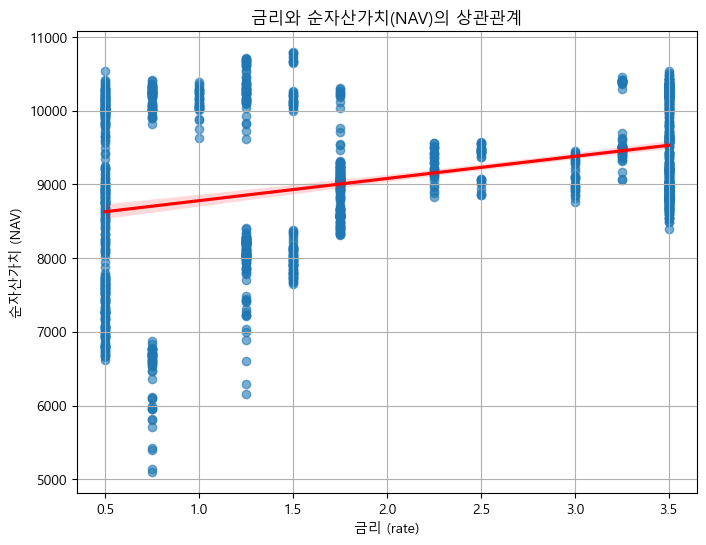

피어슨 상관계수: 0.34, p-value: 0.0000
금리와 순자산가치(NAV) 간의 상관관계는 통계적으로 유의합니다.


In [109]:
# 상관분석 1 : 금리, '순자산가치(NAV)'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 금리와 순자산가치 데이터 선택
data = merged_df[['rate', '순자산가치(NAV)']].dropna()  # 결측값 제거

# 데이터 타입 변환 (숫자로 변환)
data['rate'] = data['rate'].astype(float)
data['순자산가치(NAV)'] = data['순자산가치(NAV)'].astype(float)

# 상관계수 계산
correlation = data['rate'].corr(data['순자산가치(NAV)'])  # 피어슨 상관계수
print(f"금리와 순자산가치(NAV)의 상관계수: {correlation:.2f}")

# 시각화: 산점도와 추세선
plt.figure(figsize=(8, 6))
sns.regplot(x='rate', y='순자산가치(NAV)', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('금리와 순자산가치(NAV)의 상관관계')
plt.xlabel('금리 (rate)')
plt.ylabel('순자산가치 (NAV)')
plt.grid(True)
plt.show()

# 통계적 유의성 검정
corr, p_value = pearsonr(data['rate'], data['순자산가치(NAV)'])
print(f"피어슨 상관계수: {corr:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("금리와 순자산가치(NAV) 간의 상관관계는 통계적으로 유의합니다.")
else:
    print("금리와 순자산가치(NAV) 간의 상관관계는 통계적으로 유의하지 않습니다.")


금리와 순자산총액의 상관계수: -0.32


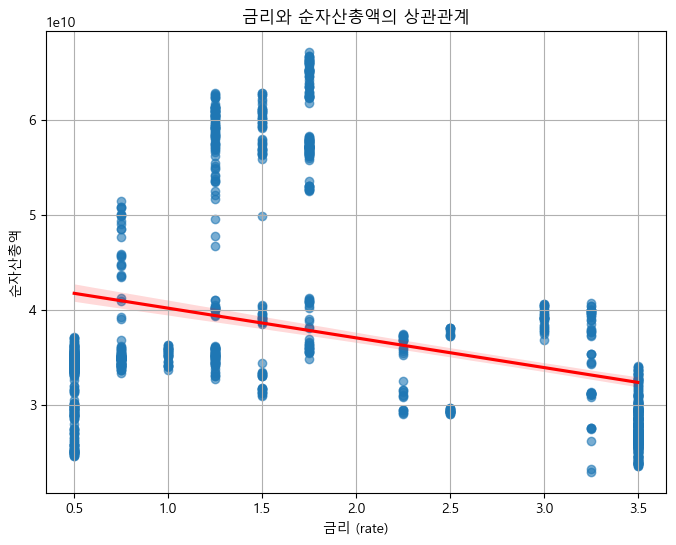

피어슨 상관계수: -0.32, p-value: 0.0000
금리와 순자산총액 간의 상관관계는 통계적으로 유의합니다.


In [116]:
# 상관분석 1 : 금리, '순자산총액'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 금리와 순자산가치 데이터 선택
data = merged_df[['rate', '순자산총액']].dropna()  # 결측값 제거

# 데이터 타입 변환 (숫자로 변환)
data['rate'] = data['rate'].astype(float)
data['순자산총액'] = data['순자산총액'].astype(float)

# 상관계수 계산
correlation = data['rate'].corr(data['순자산총액'])  # 피어슨 상관계수
print(f"금리와 순자산총액의 상관계수: {correlation:.2f}")

# 시각화: 산점도와 추세선
plt.figure(figsize=(8, 6))
sns.regplot(x='rate', y='순자산총액', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('금리와 순자산총액의 상관관계')
plt.xlabel('금리 (rate)')
plt.ylabel('순자산총액')
plt.grid(True)
plt.show()

# 통계적 유의성 검정
corr, p_value = pearsonr(data['rate'], data['순자산총액'])
print(f"피어슨 상관계수: {corr:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("금리와 순자산총액 간의 상관관계는 통계적으로 유의합니다.")
else:
    print("금리와 순자산총액 간의 상관관계는 통계적으로 유의하지 않습니다.")


                  종가        대비       등락률  순자산가치(NAV)        시가        고가  \
종가          1.000000 -0.116421  0.039759    0.999630  0.997880  0.998983   
대비         -0.116421  1.000000 -0.164777   -0.117199 -0.108499 -0.094412   
등락률         0.039759 -0.164777  1.000000    0.041337 -0.012653  0.007145   
순자산가치(NAV)  0.999630 -0.117199  0.041337    1.000000  0.997459  0.998588   
시가          0.997880 -0.108499 -0.012653    0.997459  1.000000  0.999254   
고가          0.998983 -0.094412  0.007145    0.998588  0.999254  1.000000   
저가          0.999296 -0.129778  0.021231    0.998966  0.998762  0.998801   
거래량        -0.045771  0.089380  0.009886   -0.046990 -0.046915 -0.043644   
거래대금       -0.011518  0.090189  0.004087   -0.012851 -0.012172 -0.008954   
시가총액       -0.370339 -0.055664 -0.043517   -0.370485 -0.371592 -0.374323   
순자산총액      -0.366239 -0.055188 -0.044451   -0.366487 -0.367422 -0.370158   
상장좌수       -0.645551  0.018293 -0.052130   -0.645648 -0.646139 -0.647888   
기초지수_종가     

c:\Users\jd421\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.

c:\Users\jd421\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



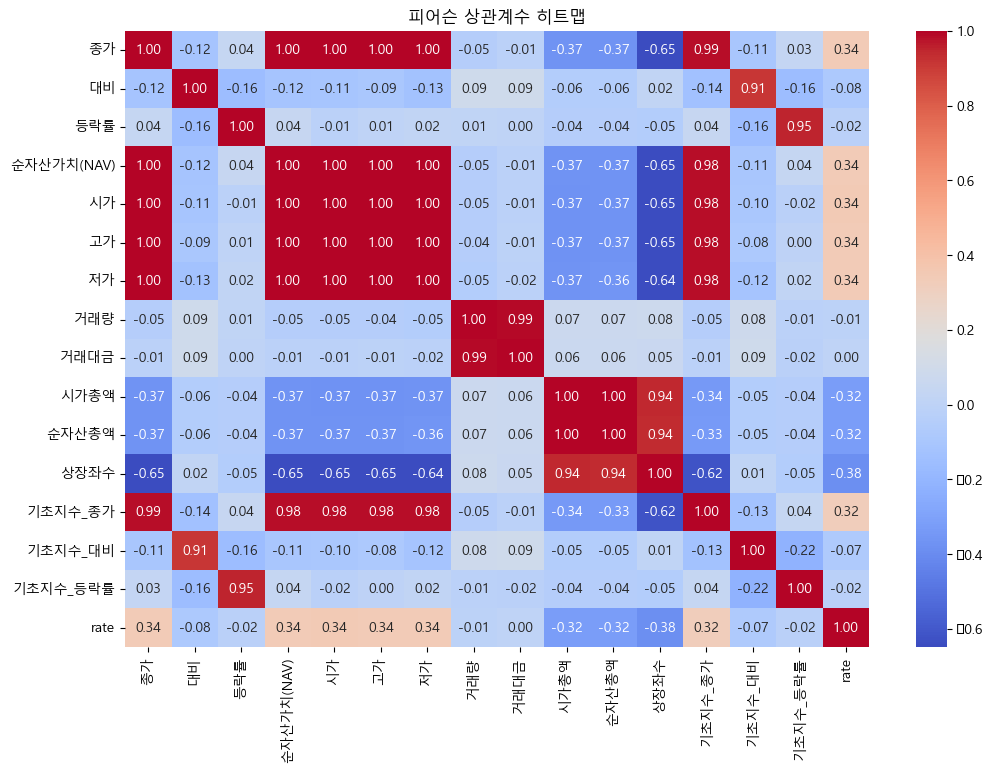

In [ ]:
merged_df['rate'] = merged_df['rate'].astype(float)

# 상관계수 확인

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터만 선택 (상관계수는 수치형 변수에서만 계산 가능)
numeric_data = merged_df.select_dtypes(include=['float64', 'int64'])

# 피어슨 상관계수 계산
correlation_matrix = numeric_data.corr(method='pearson')

# 상관계수 출력
print(correlation_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("피어슨 상관계수 히트맵")
plt.show()


In [117]:
# 시계열 분석
# 상관 분석 


In [118]:
# t-검정
import pandas as pd
from scipy.stats import ttest_ind

# 데이터 준비
data = merged_df[['rate', '순자산가치(NAV)', '순자산총액']].dropna()

# 금리 기준 설정 (예: 평균 금리)
rate_threshold = data['rate'].mean()  # 금리 평균값을 기준으로 분류

# 그룹 나누기
group1 = data[data['rate'] > rate_threshold]  # 금리 상승기
group2 = data[data['rate'] <= rate_threshold]  # 금리 비상승기

# t-검정 수행 (순자산가치(NAV))
t_stat_nav, p_value_nav = ttest_ind(group1['순자산가치(NAV)'], group2['순자산가치(NAV)'], equal_var=False)

# t-검정 수행 (순자산총액)
t_stat_total, p_value_total = ttest_ind(group1['순자산총액'], group2['순자산총액'], equal_var=False)

# 결과 출력
print("금리 상승기와 비상승기 간 순자산가치(NAV)의 t-검정 결과:")
print(f"t-통계량: {t_stat_nav:.3f}, p-value: {p_value_nav:.4f}")
if p_value_nav < 0.05:
    print("귀무가설을 기각합니다: 금리 상승기와 비상승기 간 순자산가치의 평균은 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다: 금리 상승기와 비상승기 간 순자산가치의 평균은 유의미한 차이가 없습니다.")

print("\n금리 상승기와 비상승기 간 순자산총액의 t-검정 결과:")
print(f"t-통계량: {t_stat_total:.3f}, p-value: {p_value_total:.4f}")
if p_value_total < 0.05:
    print("귀무가설을 기각합니다: 금리 상승기와 비상승기 간 순자산총액의 평균은 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다: 금리 상승기와 비상승기 간 순자산총액의 평균은 유의미한 차이가 없습니다.")


금리 상승기와 비상승기 간 순자산가치(NAV)의 t-검정 결과:
t-통계량: 14.778, p-value: 0.0000
귀무가설을 기각합니다: 금리 상승기와 비상승기 간 순자산가치의 평균은 유의미한 차이가 있습니다.

금리 상승기와 비상승기 간 순자산총액의 t-검정 결과:
t-통계량: -27.772, p-value: 0.0000
귀무가설을 기각합니다: 금리 상승기와 비상승기 간 순자산총액의 평균은 유의미한 차이가 있습니다.


In [123]:
# 카이제곱 검정 - 순자산가치

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 데이터 준비
# 금리 상승 여부를 범주형으로 분류
merged_df['금리_상승'] = np.where(merged_df['rate'] > merged_df['rate'].mean(), '상승기', '비상승기')

# 순자산총액 증가/감소 여부를 범주형으로 분류
merged_df['순자산가치_변화'] = np.where(merged_df['순자산가치(NAV)'].diff() > 0, '증가', '감소')

# 교차표 생성
contingency_table = pd.crosstab(merged_df['금리_상승'], merged_df['순자산가치_변화'])

print("교차표:")
print(contingency_table)

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("\n카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("\n기대 빈도표:")
print(expected)

# 결과 해석
if p < 0.05:
    print("\n귀무가설을 기각합니다: 금리 상승 여부와 순자산가치 변화 간에는 연관이 있습니다.")
else:
    print("\n귀무가설을 채택합니다: 금리 상승 여부와 순자산가치 변화 간에는 연관이 없습니다.")


교차표:
순자산가치_변화   감소   증가
금리_상승             
비상승기      379  493
상승기       265  302

카이제곱 검정 결과:
카이제곱 통계량: 1.36
p-value: 0.2435
자유도: 1

기대 빈도표:
[[390.24878388 481.75121612]
 [253.75121612 313.24878388]]

귀무가설을 채택합니다: 금리 상승 여부와 순자산가치 변화 간에는 연관이 없습니다.


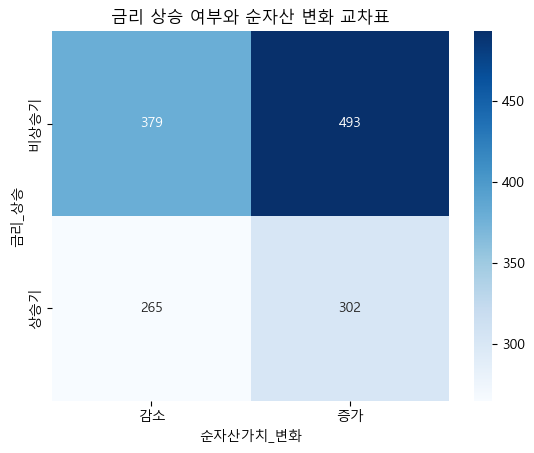

In [124]:
import seaborn as sns
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("금리 상승 여부와 순자산 변화 교차표")
plt.show()


In [125]:
# 카이제곱 검정 - 순자산총액

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 데이터 준비
# 금리 상승 여부를 범주형으로 분류
merged_df['금리_상승'] = np.where(merged_df['rate'] > merged_df['rate'].mean(), '상승기', '비상승기')

# 순자산총액 증가/감소 여부를 범주형으로 분류
merged_df['순자산_변화'] = np.where(merged_df['순자산총액'].diff() > 0, '증가', '감소')

# 교차표 생성
contingency_table = pd.crosstab(merged_df['금리_상승'], merged_df['순자산_변화'])

print("교차표:")
print(contingency_table)

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("\n카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("\n기대 빈도표:")
print(expected)

# 결과 해석
if p < 0.05:
    print("\n귀무가설을 기각합니다: 금리 상승 여부와 순자산 변화 간에는 연관이 있습니다.")
else:
    print("\n귀무가설을 채택합니다: 금리 상승 여부와 순자산 변화 간에는 연관이 없습니다.")


교차표:
순자산_변화   감소   증가
금리_상승           
비상승기    388  484
상승기     268  299

카이제곱 검정 결과:
카이제곱 통계량: 0.95
p-value: 0.3285
자유도: 1

기대 빈도표:
[[397.52050035 474.47949965]
 [258.47949965 308.52050035]]

귀무가설을 채택합니다: 금리 상승 여부와 순자산 변화 간에는 연관이 없습니다.


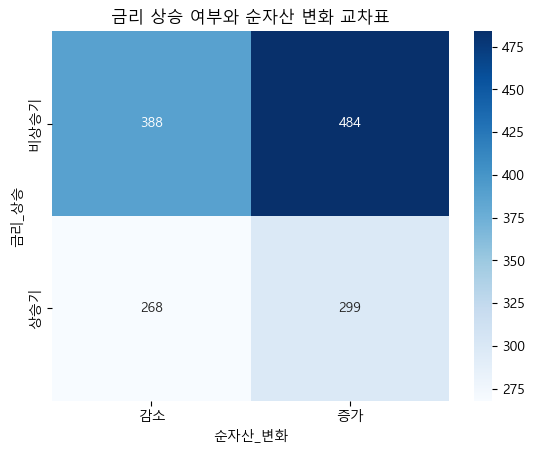

In [126]:
import seaborn as sns
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("금리 상승 여부와 순자산 변화 교차표")
plt.show()


c:\Users\jd421\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



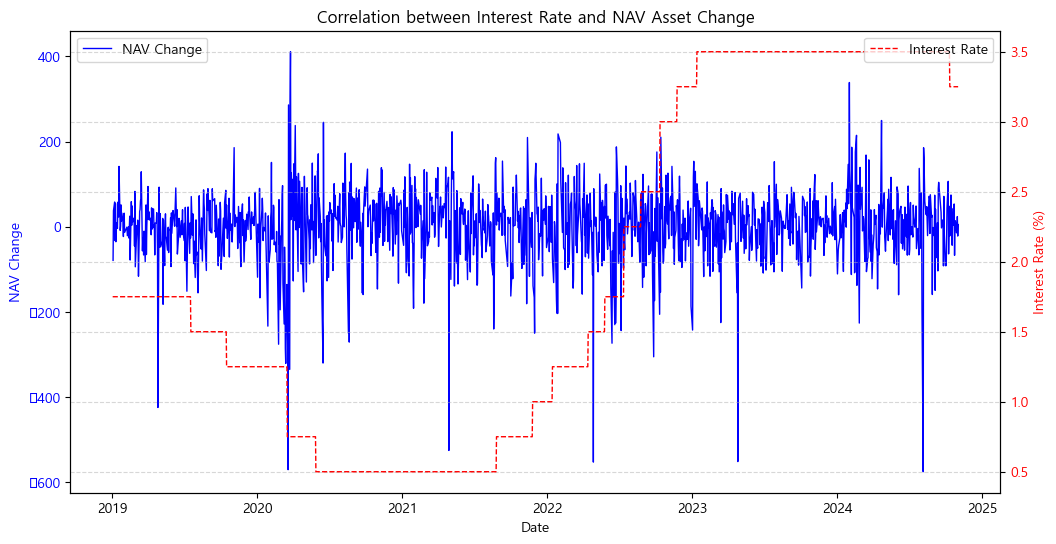

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
# 금리 변화와 순자산가치(NAV) 및 순자산총액 변화 데이터 선택
data = merged_df[['일자', 'rate', '순자산가치(NAV)', '순자산총액']].dropna()

# '일자'를 datetime 형식으로 변환
data['일자'] = pd.to_datetime(data['일자'])

# 순자산가치 및 순자산총액의 변화율 계산 (diff 사용)
data['NAV_변화'] = data['순자산가치(NAV)'].diff()
data['총액_변화'] = data['순자산총액'].diff()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (NAV 변화)
ax1.plot(data['일자'], data['NAV_변화'], label='NAV Change', color='blue', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('NAV Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 축 (금리)
ax2 = ax1.twinx()
ax2.plot(data['일자'], data['rate'], label='Interest Rate', color='red', linewidth=1, linestyle='--')
ax2.set_ylabel('Interest Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 추가
plt.title('Correlation between Interest Rate and NAV Asset Change')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


c:\Users\jd421\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



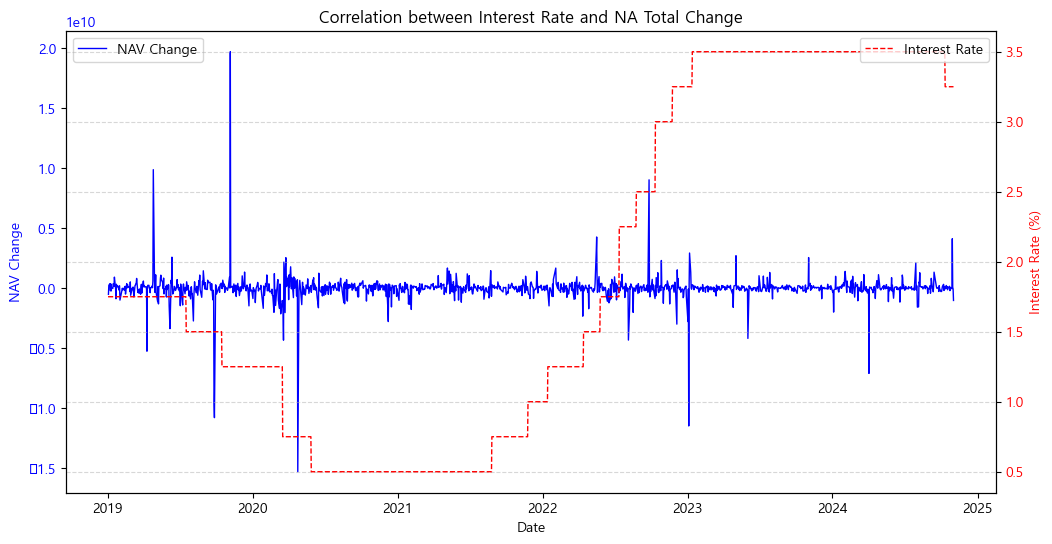

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
# 금리 변화와 순자산가치(NAV) 및 순자산총액 변화 데이터 선택
data = merged_df[['일자', 'rate', '순자산가치(NAV)', '순자산총액']].dropna()

# '일자'를 datetime 형식으로 변환
data['일자'] = pd.to_datetime(data['일자'])

# 순자산가치 및 순자산총액의 변화율 계산 (diff 사용)
data['NAV_변화'] = data['순자산가치(NAV)'].diff()
data['총액_변화'] = data['순자산총액'].diff()

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (총액 변화)
ax1.plot(data['일자'], data['총액_변화'], label='NAV Change', color='blue', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('NAV Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 축 (금리)
ax2 = ax1.twinx()
ax2.plot(data['일자'], data['rate'], label='Interest Rate', color='red', linewidth=1, linestyle='--')
ax2.set_ylabel('Interest Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 추가
plt.title('Correlation between Interest Rate and NA Total Change')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 출력
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
